In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.utils import to_categorical

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n_pts = 500
centers = [[0,1.5],[-1,-1.5],[1.5,-1]]
X,y = make_blobs(n_pts,centers=centers,cluster_std=0.4)

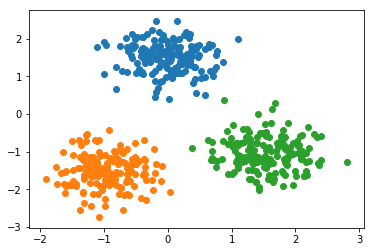

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [4]:
y_cat = to_categorical(y,3)

In [5]:
model = Sequential()
model.add(Dense(3,activation='softmax'))
model.compile(optimizer=Adam(lr=0.001),loss=categorical_crossentropy,metrics=['acc'])

In [6]:
log = model.fit(X,y_cat,validation_split=0.2,epochs = 100,batch_size=64,shuffle=True)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 2s 6ms/step - loss: 0.5312 - acc: 0.9275 - val_loss: 0.5459 - val_acc: 0.9300
Epoch 2/100
400/400 [==============================] - 0s 72us/step - loss: 0.5226 - acc: 0.9375 - val_loss: 0.5370 - val_acc: 0.9400
Epoch 3/100
400/400 [==============================] - 0s 77us/step - loss: 0.5138 - acc: 0.9475 - val_loss: 0.5281 - val_acc: 0.9400
Epoch 4/100
400/400 [==============================] - 0s 75us/step - loss: 0.5051 - acc: 0.9550 - val_loss: 0.5193 - val_acc: 0.9400
Epoch 5/100
400/400 [==============================] - 0s 75us/step - loss: 0.4964 - acc: 0.9550 - val_loss: 0.5108 - val_acc: 0.9400
Epoch 6/100
400/400 [==============================] - 0s 70us/step - loss: 0.4881 - acc: 0.9600 - val_loss: 0.5024 - val_acc: 0.9400
Epoch 7/100
400/400 [==============================] - 0s 72us/step - loss: 0.4799 - acc: 0.9625 - val_loss: 0.4942 - val_acc: 0.9400
Epoch 8/100
400/4

400/400 [==============================] - 0s 67us/step - loss: 0.2254 - acc: 0.9975 - val_loss: 0.2370 - val_acc: 0.9800
Epoch 62/100
400/400 [==============================] - 0s 67us/step - loss: 0.2228 - acc: 0.9975 - val_loss: 0.2345 - val_acc: 0.9900
Epoch 63/100
400/400 [==============================] - 0s 67us/step - loss: 0.2203 - acc: 0.9975 - val_loss: 0.2319 - val_acc: 0.9900
Epoch 64/100
400/400 [==============================] - 0s 62us/step - loss: 0.2179 - acc: 0.9975 - val_loss: 0.2294 - val_acc: 0.9900
Epoch 65/100
400/400 [==============================] - 0s 65us/step - loss: 0.2154 - acc: 0.9975 - val_loss: 0.2270 - val_acc: 0.9900
Epoch 66/100
400/400 [==============================] - 0s 65us/step - loss: 0.2131 - acc: 0.9975 - val_loss: 0.2245 - val_acc: 0.9900
Epoch 67/100
400/400 [==============================] - 0s 65us/step - loss: 0.2107 - acc: 0.9975 - val_loss: 0.2221 - val_acc: 0.9900
Epoch 68/100
400/400 [==============================] - 0s 65us/step

Text(0,0.5,'Loss')

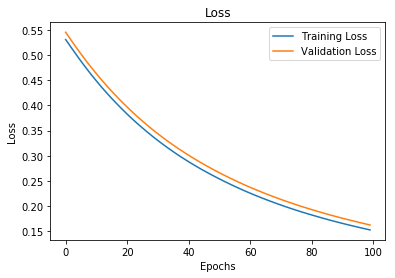

In [7]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0,0.5,'Accuracy')

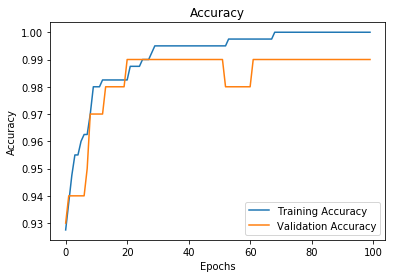

In [8]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title("Accuracy")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [9]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(X[:,0].min()-0.2,X[:,0].max()+0.2)
    y_span = np.linspace(X[:,1].min()-0.2,X[:,1].max()+0.2)
    xx,yy = np.meshgrid(x_span,y_span)
    grid = np.c_[xx.flatten(),yy.flatten()]
    predictions = model.predict_classes(grid)
    z = predictions.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    

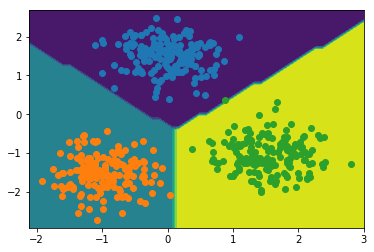

In [10]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])